Author: Steve Eckardt 
Revised: 10/28/22 
Description: Analysis and evaluation of charbot data 
             Open Avenues and Businessolver Internship

This is a summary of this project in the STAR format
Situation: I'm participating in an internship where we're studying text sent to and from a chatbot.
Task: evaluate chatbot data.
Action: I cleaned and analyzed the chatbot data using python, panda and mathlab.
Result: determined who was sending Tweets, when they were sending them, and what the Tweets contained.

The given data set is a CSV file of instant messages sent to and from a chatbot.
The first step in exploration is understand and document columns in the data set.

In [2]:
import pandas as pd
import numpy as np
twcs_df = pd.read_csv("/Users/nepets/chatbot/twcs.csv")

In [3]:
# determine number of columns and rows
print('shape is:', twcs_df.shape)

shape is: (2811774, 7)


In [4]:
# print the first ten records
twcs_df.head(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,NaN,12.0
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,"11,13,14",15.0
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,12,16.0


In [4]:
#list the data types
twcs_df.dtypes

tweet_id                     int64
author_id                   object
inbound                       bool
created_at                  object
text                        object
response_tweet_id           object
in_response_to_tweet_id    float64
dtype: object

The data contains about 2.8 million records and seven columns.

All listed above as objects are strings.

The line number is displayed at the far leftt but it is not in a column. 
tweet_id is a unique identifier for each record and can be used as a key or index. author_id is address of the person or bot sending the tweet. 
inbound is a boolean value. If true the message is sent to the bot. If false the message is from the bot. 
created_at is a string stating the date and time the Tweet was created. 
text is the Tweet. 
response_tweet_id is the tweet_id of the original Tweet. 
in_response_to_tweet_id is the tweet_id of the Tweet that started the conversation.

The following code will clean the data. 
Comverting the created at time stamp from a string to a datatime object. 
Clean the text of the Tweet by casting it to lovercase, removing URLs. punctuation, stop words, 10 most common words, 10 rarest words, and emojis. 
The clean data will be put in two new columns preserving the original sata set.

In [5]:
# Translate the created_at column from a string to a datetime object in a new column
# add a column to put the cleaned text in
import datetime
twcs_df['created_td'] = pd.to_datetime(twcs_df['created_at'])
twcs_df['clean_text'] = 'clean tweet'

In [6]:
# cast the tweet text into lowercase
twcs_df['clean_text'] = twcs_df.loc[:,'text'].str.lower()

In [7]:
# remove all URLs from text
import re
twcs_df['clean_text'] = twcs_df['clean_text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

In [8]:
# remove punctuation with the exception of the @ symbol
import string
punctuations = '!"#$%&\'()*+,-./:;<=>?[\]^_`{|}~'
print(punctuations)

%timeit
def remove_punctuations(text):
    return text.translate(str.maketrans('','',punctuations))
    
twcs_df['clean_text'] = twcs_df['clean_text'].apply(lambda text: remove_punctuations(text))

!"#$%&'()*+,-./:;<=>?[\]^_`{|}~


In [9]:
# import and update Natural Language Toolkit
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# nltk.download()

In [10]:
# import and list stopwords
# nltk.download('stopwords')
from nltk.corpus import stopwords
', '.join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [11]:
# remove the stop words listed above
stopwords_set = set(stopwords.words('english'))
def remove_stopwords(text):
    return ' '.join(words for words in str(text).split() if words not in stopwords_set)
    
twcs_df['clean_text'] = twcs_df['clean_text'].apply(lambda text: remove_stopwords(text))

In [12]:
# count frequency of word use
from collections import Counter
cnt = Counter()

for text in twcs_df['clean_text'].values:
    for word in text.split():
        cnt[word] +=1
        
cnt.most_common(10)

[('us', 451277),
 ('please', 402715),
 ('dm', 335422),
 ('help', 267643),
 ('hi', 224603),
 ('thanks', 206452),
 ('get', 200373),
 ('sorry', 192246),
 ('like', 146386),
 ('know', 145409)]

In [13]:
# remove 10 most common words
freq_words = set([w for (w,wc) in cnt.most_common(10)])

def remove_freqwords(text):
    return ' '.join(word for word in str(text).split() if word not in freq_words)

twcs_df['clean_text'] = twcs_df['clean_text'].apply(lambda text:remove_freqwords(text))

In [14]:
# remove 10 rarest words
n_rare_words = 10
rare_words = set([w for (w,c) in cnt.most_common()][:- n_rare_words: -1])
print(rare_words)

def remove_rarewords(text):
    return ' '.join(word for word in str(text).split() if word not in rare_words)

twcs_df['clean_text'] = twcs_df['clean_text'].apply(lambda text:remove_rarewords(text))

{'当サイトからそのようなメールをお送りすることはございません。当サイトの名をかたるフィッシング行為が増えているようです。連絡先に電話をしたりしないようお気を付けください。', 'いきなり来たんだけど', '@823867', '@823869', 'notjustxmasallyearround', '@823870', 'なんですかこれ！！？', '@823866', '@823868'}


In [15]:
# This will remove all numbers but it would also remove the Tweet IDs
# numbers = '0123456789'
# %timeit
# def remove_numbers(text):
#    return text.translate(str.maketrans('','',numbers))
    
# twcs_df['clean_text'] = twcs_df['clean_text'].apply(lambda text: remove_numbers(text))
# twcs_df.head(10)

In [16]:
# remove emoji
from cleantext import clean
def remove_emoji(text):
    return clean(text, no_emoji=True)
twcs_df['clean_text'] = twcs_df['clean_text'].apply(lambda text:remove_emoji(text))

After cleaning the tweet text, I wanted to compare the difference.

In [19]:
twcs_df.loc[1:40,['text','clean_text']]

,text,clean_text
1,@sprintcare and how do you propose we do that,@sprintcare propose
2,@sprintcare I have sent several private messag...,@sprintcare sent several private messages one ...
3,@115712 Please send us a Private Message so th...,@115712 send private message assist click 'mes...
4,@sprintcare I did.,@sprintcare
5,@115712 Can you please send us a private messa...,@115712 send private message gain details account
6,@sprintcare is the worst customer service,@sprintcare worst customer service
7,@115713 This is saddening to hear. Please shoo...,@115713 saddening hear shoot look kc
8,@sprintcare You gonna magically change your co...,@sprintcare gonna magically change connectivit...
9,@115713 We understand your concerns and we'd l...,@115713 understand concerns wed send direct me...
10,@sprintcare Since I signed up with you....Sinc...,@sprintcare since signed yousince day 1


In [20]:
#list the data types
twcs_df.dtypes

tweet_id                                 int64
author_id                               object
inbound                                   bool
created_at                              object
text                                    object
response_tweet_id                       object
in_response_to_tweet_id                float64
created_td                 datetime64[ns, UTC]
clean_text                              object
dtype: object

In [21]:
# list the size of each cilumn in bytes
twcs_df.memory_usage(deep=True)

Index                            128
tweet_id                    22494192
author_id                  182884606
inbound                      2811774
created_at                 244624338
text                       590460669
response_tweet_id          149127014
in_response_to_tweet_id     22494192
created_td                  22494192
clean_text                 358034225
dtype: int64

The text size was reduced from 590 million bytes to 358 million bytes.  In other words 40% of the text was removed.

In [22]:
# recount frequency of word use
cnt = Counter()

for text in twcs_df['clean_text'].values:
    for word in text.split():
        cnt[word] +=1
        
cnt.most_common(10)

[('look', 139620),
 ('send', 138915),
 ('@amazonhelp', 137238),
 ('well', 134029),
 ('service', 133716),
 ('im', 131788),
 ('number', 123459),
 ('account', 120118),
 ('email', 116879),
 ('phone', 114018)]

The most common words are now a better indication of the information being sent to and from the chatbot.

In [23]:
# and rare words
n_rare_words = 10
rare_words = set([w for (w,c) in cnt.most_common()][:- n_rare_words: -1])
print(rare_words)

{'@823865', '@823861', '@823862', "'spend", 'nightmaretodealwith', '@823860', 'reservationnot', '@823863', '@823864'}


I started the evaluation to determine the number of Tweeters and who is the most common.

In [24]:
twcs_df['author_id'].describe()

count        2811774
unique        702777
top       AmazonHelp
freq          169840
Name: author_id, dtype: object

There are 700,000 Tweeters.

In [25]:
# Top ten most populat outbound chatbots.
twcs_df['author_id'].value_counts().head(10)

AmazonHelp         169840
AppleSupport       106860
Uber_Support        56270
SpotifyCares        43265
Delta               42253
Tesco               38573
AmericanAir         36764
TMobileHelp         34317
comcastcares        33031
British_Airways     29361
Name: author_id, dtype: int64

<AxesSubplot:>

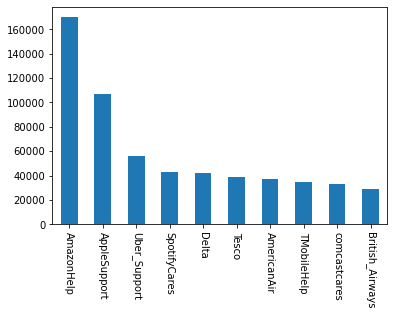

In [73]:
twcs_df['author_id'].value_counts().head(10).plot.bar(x='word', y='count', rot=270)

In [26]:
# The top 10 authors of inbound tweets.
twcs_df['author_id'].loc[twcs_df['inbound']==True].value_counts().head(10)

115911    1286
120576    1010
115913     563
116230     454
169172     448
117627     406
115888     332
116136     295
116421     276
115722     252
Name: author_id, dtype: int64

<AxesSubplot:>

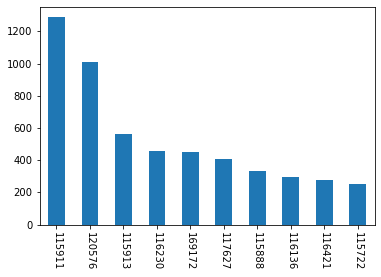

In [72]:
twcs_df['author_id'].loc[twcs_df['inbound']==True].value_counts().head(10).plot.bar(x='word', y='count', rot=270)

Next let us considered when the tweets were set.

<AxesSubplot:xlabel='created_td'>

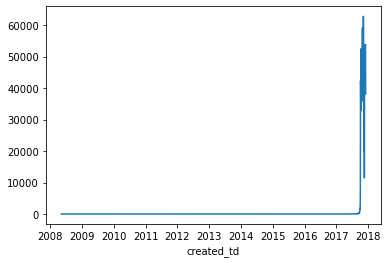

In [27]:
# this is a plot of the Tweets oer day
twcs_df['created_td'].groupby([twcs_df['created_td'].dt.date]).count().plot()

Interesting 90% of the Tweets were sent in the last quarter of 2017.

I was curious to compare the Tweets sent in the last quarter of 2016 to the Tweets sent in the last quarter of 2017.

In [37]:
# create a data frame with only records from the last quarter of 2016
lq_16_df = twcs_df.loc[twcs_df['created_td'] >= '2016-10-01']
lq_16_df = lq_16_df.loc[lq_16_df['created_td'] < '2017-01-01']

In [38]:
# Top Tweeter last quarter of 2016.
lq_16_df['author_id'].value_counts().head(10)

169172            88
Safaricom_Care    46
airtel_care       21
AmazonHelp        16
288873            15
271017            12
O2                12
GloCare           11
116076             8
121879             8
Name: author_id, dtype: int64

<AxesSubplot:>

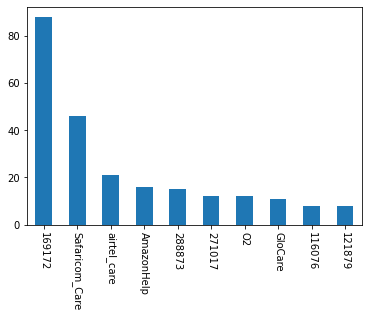

In [39]:
lq_16_df['author_id'].value_counts().head(10).plot.bar(x='word', y='count', rot=270)

<AxesSubplot:xlabel='created_td'>

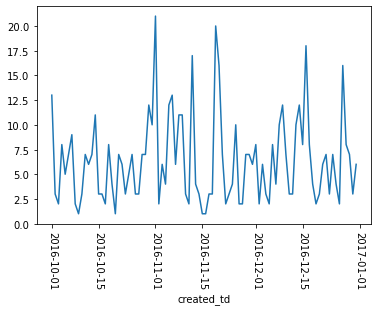

In [41]:
# When did the Tweets happen?
lq_16_df['author_id'].groupby([lq_16_df['created_td'].dt.date]).count().plot(rot=270)

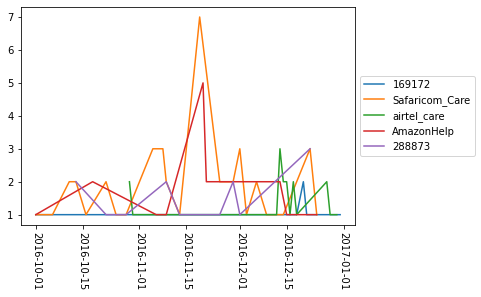

In [43]:
# Who are the top 5 Tweeter in the last quarter of 2016?
import matplotlib.dates as mdates
import matplotlib.pylab as plt
import matplotlib as mpl
lq_16_top_5 = lq_16_df['author_id'].value_counts().head().index.tolist()
for i in lq_16_top_5:
    plt.plot(lq_16_df['author_id'].loc[lq_16_df['author_id'] == i ].groupby([lq_16_df['created_td'].dt.date]).count(), label = i )
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation = 270)

In [45]:
# top 5 compared to all other Tweeters
tweets_16_df  = pd.DataFrame( columns=['author_id','count'])
for i in lq_16_top_5:
    tweets_16_df.loc[len(tweets_16_df.index)] = [i, lq_16_df['author_id'].loc[lq_16_df['author_id'] == i ].count()] 

tweets_16_df.loc[len(tweets_16_df.index)] = [ 'all others', lq_16_df['author_id'].count() - tweets_16_df['count'].sum() ]
tweets_16_df
    

,author_id,count
0,169172,88
1,Safaricom_Care,46
2,airtel_care,21
3,AmazonHelp,16
4,288873,15
5,all others,400


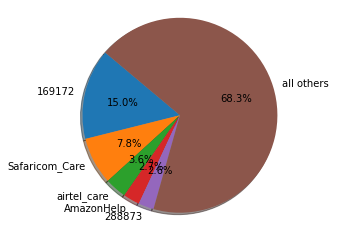

In [46]:
labels = tweets_16_df['author_id'].unique()
sizes = tweets_16_df['count']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140) 
plt.axis('equal')
plt.show()

In [59]:
# Tweet frequency by day of the week
lq_16_df['created_td'].dt.day_name().value_counts()

Saturday     116
Tuesday      109
Friday        91
Thursday      74
Sunday        71
Wednesday     71
Monday        54
Name: created_td, dtype: int64

<AxesSubplot:>

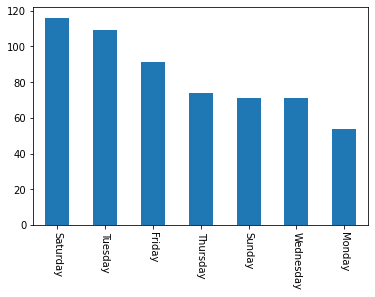

In [60]:
lq_16_df['created_td'].dt.day_name().value_counts().plot.bar(x='word', y='count', rot=270)

In [74]:
# create a data frame with only records from the last quarter of 2017
lq_17_df = twcs_df.loc[twcs_df['created_td'] >= '2017-10-01']

In [75]:
lq_17_df['author_id'].value_counts().head(10)

AmazonHelp         168993
AppleSupport       106662
Uber_Support        56084
SpotifyCares        43083
Delta               42100
Tesco               38446
AmericanAir         36666
TMobileHelp         34204
comcastcares        32938
British_Airways     29107
Name: author_id, dtype: int64

<AxesSubplot:>

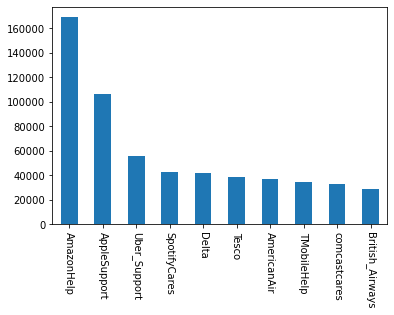

In [62]:
lq_17_df['author_id'].value_counts().head(10).plot.bar(x='word', y='count', rot=270)

<AxesSubplot:xlabel='created_td'>

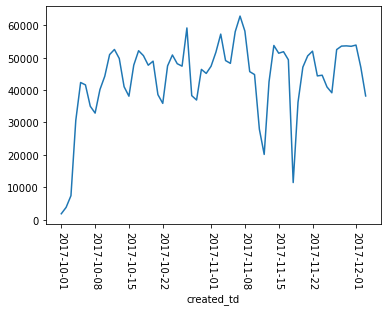

In [63]:
# When did the Tweets happen?
lq_17_df['author_id'].groupby([lq_17_df['created_td'].dt.date]).count().plot(rot=270)

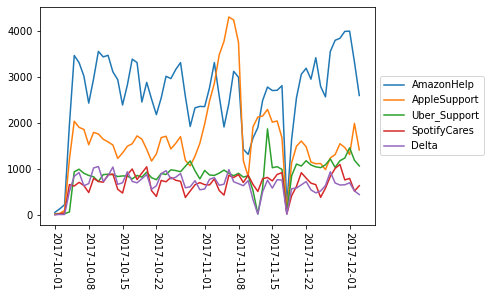

In [64]:
# Who are the top 5 Tweeter in this time frame?
lq_17_top_5 = lq_17_df['author_id'].value_counts().head().index.tolist()
for i in lq_17_top_5:
    plt.plot(lq_17_df['author_id'].loc[lq_17_df['author_id'] == i ].groupby([lq_17_df['created_td'].dt.date]).count(), label = i )
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation = 270)

In [68]:
# top 5 compared to all other Tweeters
tweets_17_df  = pd.DataFrame( columns=['author_id','count'])
for i in lq_17_top_5:
    tweets_17_df.loc[len(tweets_17_df.index)] = [i, lq_17_df['author_id'].loc[lq_17_df['author_id'] == i ].count()] 

tweets_17_df.loc[len(tweets_17_df.index)] = [ 'all others', lq_17_df['author_id'].count() - tweets_17_df['count'].sum() ]
tweets_17_df
    

,author_id,count
0,AmazonHelp,168993
1,AppleSupport,106662
2,Uber_Support,56084
3,SpotifyCares,43083
4,Delta,42100
5,all others,2374039


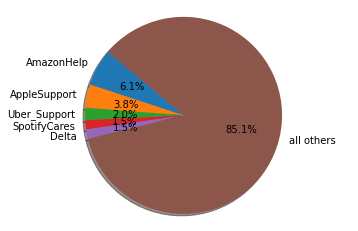

In [69]:
labels = tweets_17_df['author_id'].unique()
sizes = tweets_17_df['count']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140) 
plt.axis('equal')
plt.show()

In [70]:
# Tweet frequency by day of the week
lq_17_df['created_td'].dt.day_name().value_counts()

Friday       449070
Wednesday    442694
Thursday     436755
Tuesday      420282
Monday       385449
Saturday     329215
Sunday       327496
Name: created_td, dtype: int64

<AxesSubplot:>

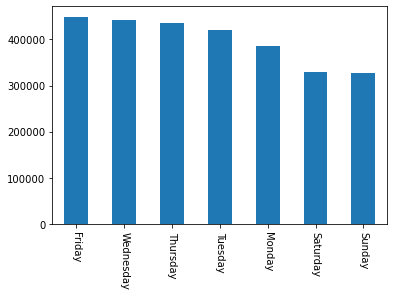

In [71]:
lq_17_df['created_td'].dt.day_name().value_counts().plot.bar(x='word', y='count', rot=270)

The 2016 data set was small enough that inbound tweets could make the top 5. In 2017 only outbound tweets were in the top 5.
In 2016 the top five tweeters composed 30% of the tweets compared to 15% in 2017.
Saturday was the most popular day in 2016 compared to weekdays in 2017.
Both quarters had a spike in the first half of November.
The main difference is that the number of tweets increased by four orders of magnitude in 2017.